In [547]:
#https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-zillow-prize
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [548]:
train=pd.read_csv('train_2016_v2.csv',parse_dates=["transactiondate"])

In [549]:
train.shape

(90275, 3)

In [550]:
train.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


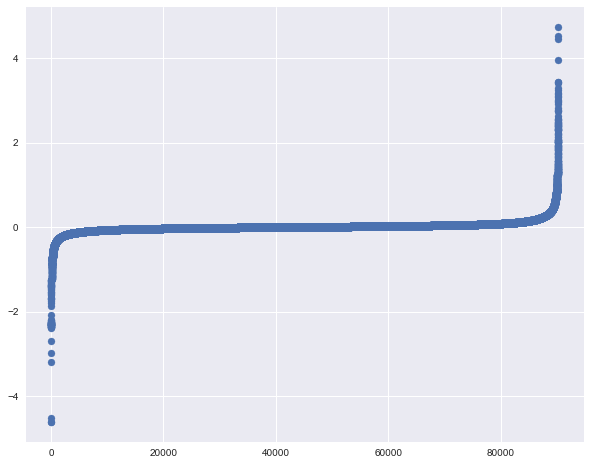

In [551]:
plt.figure(figsize=(10,8))
plt.scatter(range(train.shape[0]),np.sort(train.logerror.values))

In [552]:
ulimit=np.percentile(train.logerror,99)
llimit=np.percentile(train.logerror,1)

In [553]:
train['logerror'].loc[train['logerror']>ulimit]=ulimit
train['logerror'].loc[train['logerror']<llimit]=llimit

/Users/prabha/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


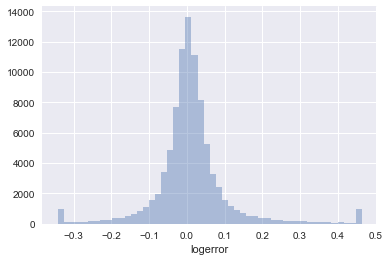

In [554]:
sns.distplot(train.logerror,bins=50,kde=False)

In [555]:
train['transactionmonth']=train.transactiondate.dt.month

In [556]:
train.dtypes

parcelid                     int64
logerror                   float64
transactiondate     datetime64[ns]
transactionmonth             int64
dtype: object

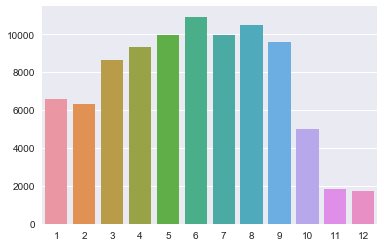

In [557]:
cnt=train['transactionmonth'].value_counts()
sns.barplot(cnt.index,cnt.values)

In [558]:
#most of the parcel ids are appearing only once
train.parcelid.value_counts().reset_index()['parcelid'].value_counts()

1    90026
2      123
3        1
Name: parcelid, dtype: int64

In [559]:
#lets explore properties_2016
prop_2016=pd.read_csv('properties_2016.csv')

/Users/prabha/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [560]:
missing_df=prop_2016.isnull().sum(axis=0).reset_index()
missing_df.columns=['column_name','missing_count']
missing_df=missing_df[missing_df.missing_count>0]

In [561]:
missing_df=missing_df.sort_values('missing_count')

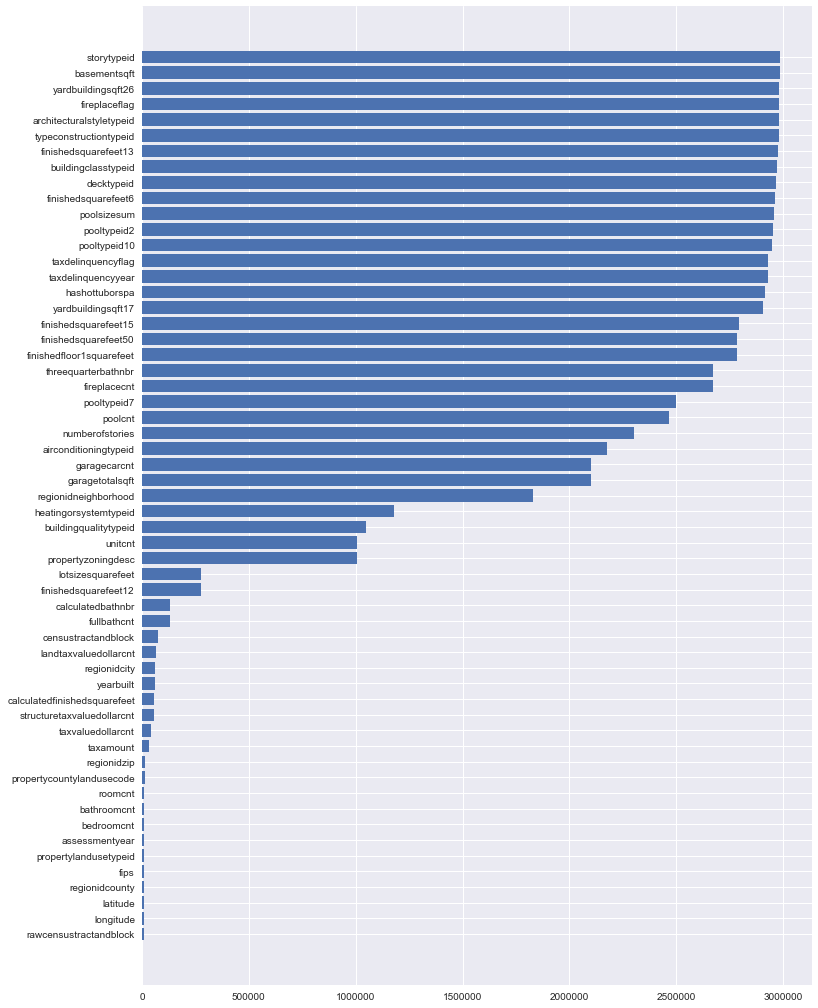

In [562]:
fig,ax=plt.subplots(figsize=(12,18))
ax.barh(range(missing_df.shape[0]),missing_df.missing_count.values)
ax.set_yticks(range(missing_df.shape[0]))
ax.set_yticklabels(missing_df.column_name)
plt.show()

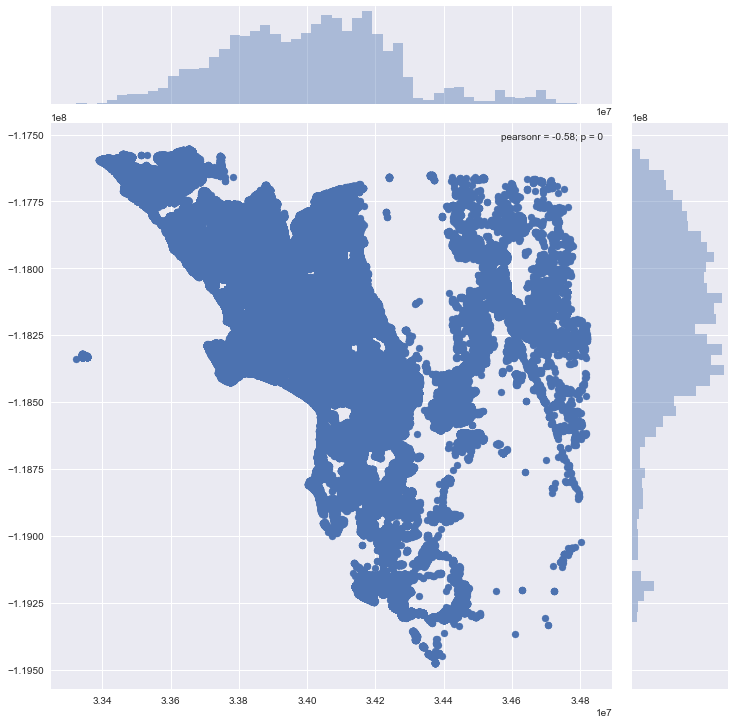

In [563]:
plt.figure(figsize=(12,12))
sns.jointplot(x=prop_2016.latitude.values,y=prop_2016.longitude.values,size=10)

In [564]:
train=pd.merge(train,prop_2016,how='left',on='parcelid')

In [565]:
train.head()

,parcelid,logerror,transactiondate,transactionmonth,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1,1.0,NaN,NaN,2.0,3.0,NaN,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,1,NaN,NaN,NaN,3.5,4.0,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1,1.0,NaN,NaN,3.0,2.0,NaN,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1,1.0,NaN,NaN,2.0,2.0,NaN,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,1,NaN,NaN,NaN,2.5,4.0,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [566]:
#check number of nulls
missing_df=train.isnull().sum().reset_index()
missing_df.columns=['column_name','missing_count']
missing_df['missing_ratio']=missing_df['missing_count']/train.shape[0]
missing_df[missing_df['missing_ratio']>.999]

,column_name,missing_count,missing_ratio
6,basementsqft,90232,0.999524
9,buildingclasstypeid,90259,0.999823
16,finishedsquarefeet13,90242,0.999634
44,storytypeid,90232,0.999524


In [567]:
#UNivariate Analysis
#take float variables and get the correlation with target variable
#mean_values=
mean_values=train.mean(axis=0)
train1=train.fillna(mean_values,inplace=True)

In [568]:
x_cols=[cols for cols in train1.columns if cols not in ['logerror'] if train1[cols].dtype=='float64']

In [569]:
labels=[]
values=[]
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(train1[col].values,train1['logerror'].values)[0,1])
corr_df=pd.DataFrame({'col_labels':labels,'corr_values':values})
corr_df=corr_df.sort_values(by='corr_values')

/Users/prabha/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:3003: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/prabha/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:3004: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


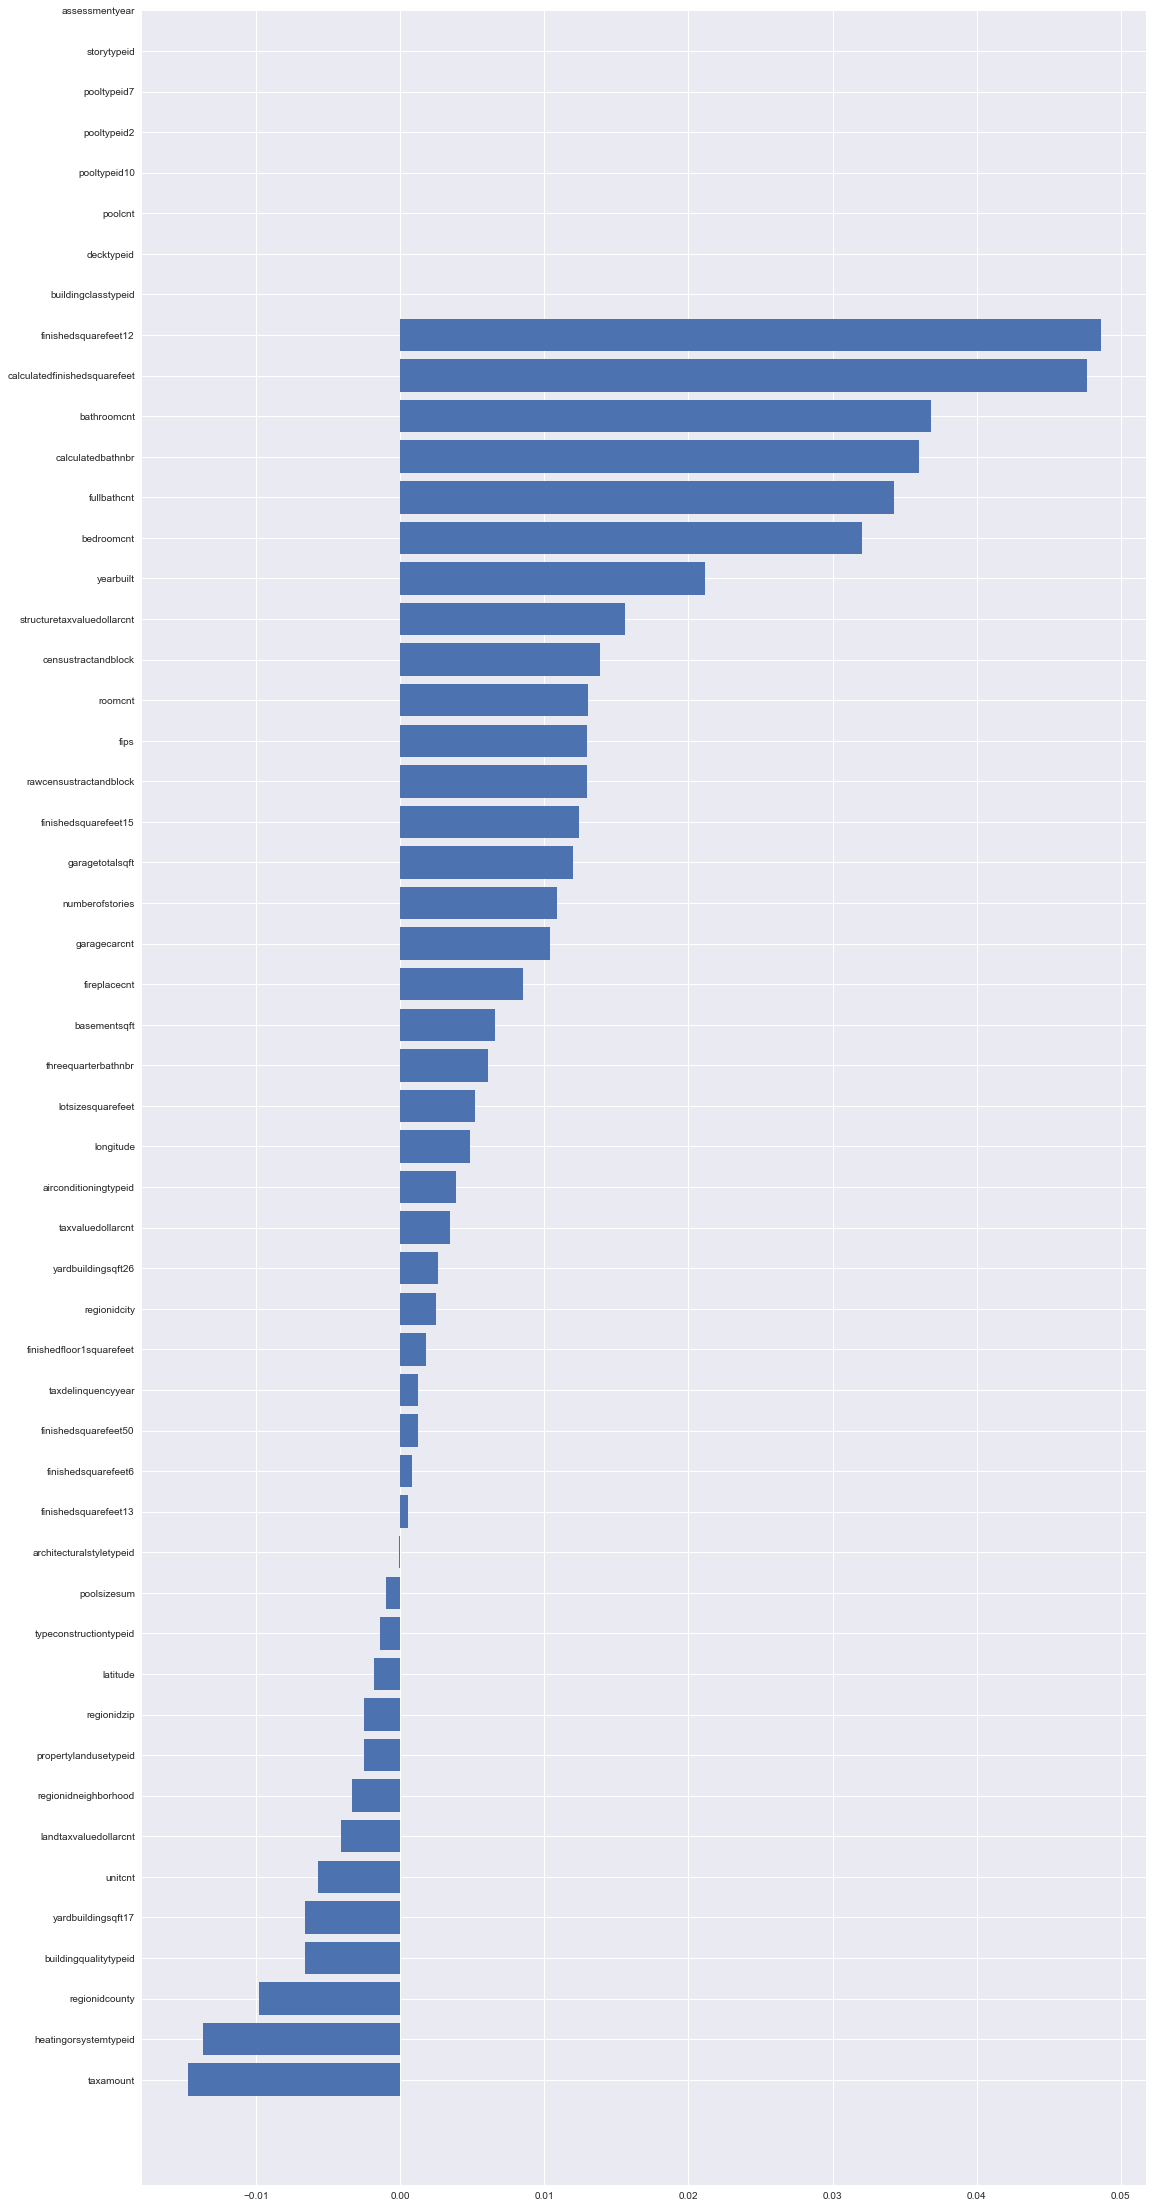

In [570]:
ind= range(corr_df.shape[0])
fig,ax=plt.subplots(figsize=(18,40))
ax.barh(ind,corr_df.corr_values.values)
ax.set_yticks(ind)
ax.set_yticklabels(corr_df['col_labels'].values)
plt.show()

In [571]:
#Below columns have no correlation becaus eit might have only one unique value , lets test this 
corr_zero_cols=['assessmentyear','storytypeid','pooltypeid7','pooltypeid2','pooltypeid2','poolcnt','decktypeid',
                'buildingclasstypeid']

In [572]:

train1[corr_zero_cols].nunique()

assessmentyear         1
storytypeid            1
pooltypeid7            1
pooltypeid2            1
pooltypeid2            1
poolcnt                1
decktypeid             1
buildingclasstypeid    1
dtype: int64

In [573]:
#take only highy correlated variables
High_corr_df=corr_df[(corr_df['corr_values']>.02)|(corr_df['corr_values']<-.01)]
High_corr_df

,col_labels,corr_values
49,taxamount,-0.014768
21,heatingorsystemtypeid,-0.013732
43,yearbuilt,0.021171
4,bedroomcnt,0.032035
18,fullbathcnt,0.034267
7,calculatedbathnbr,0.036019
3,bathroomcnt,0.036862
10,calculatedfinishedsquarefeet,0.047659
11,finishedsquarefeet12,0.048611


In [574]:
cols_to_use=High_corr_df.col_labels.tolist()
cols_to_use

['taxamount',
 'heatingorsystemtypeid',
 'yearbuilt',
 'bedroomcnt',
 'fullbathcnt',
 'calculatedbathnbr',
 'bathroomcnt',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12']

In [575]:
temp_df=train[cols_to_use]
corrmat=temp_df.corr(method='spearman')

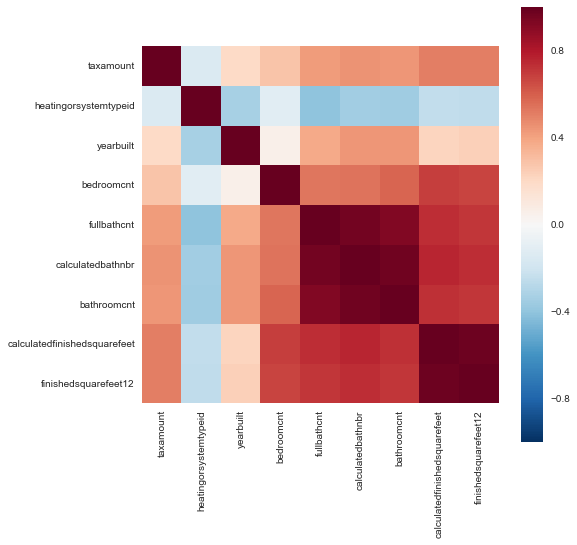

In [576]:
f,ax=plt.subplots(figsize=(8,8))
sns.heatmap(corrmat,vmax=1.,square=True)


In [577]:
col="finishedsquarefeet12"
ulimit=np.percentile(train[col],99.5)
llimit=np.percentile(train[col],0.5)

In [578]:
train[col].ix[train[col]>ulimit]=ulimit
train[col].ix[train[col]<llimit]=llimit

/Users/prabha/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.
/Users/prabha/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [579]:
train['bathroomcnt'].value_counts()

2.0     36534
3.0     19946
1.0     15035
2.5      8091
4.0      3743
1.5      1641
0.0      1165
5.0      1142
3.5      1091
4.5       795
6.0       448
5.5       253
7.0       155
8.0       114
6.5        54
9.0        36
10.0       14
7.5         9
11.0        3
12.0        3
8.5         1
20.0        1
15.0        1
Name: bathroomcnt, dtype: int64

In [580]:
train['logerror'].values

array([ 0.0276, -0.1684, -0.004 , ..., -0.2679,  0.0602,  0.4207])

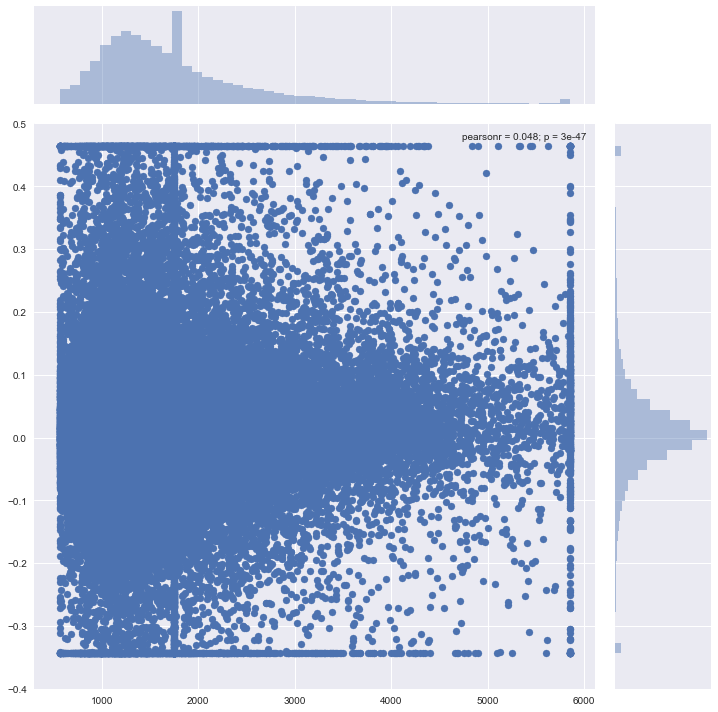

In [581]:
plt.figure(figsize=(12,12))
sns.jointplot(x=train.finishedsquarefeet12.values,y=train['logerror'].values,size=10)
sns.plt.ylim(-0.4,0.5)
plt.show()

In [582]:
col="calculatedfinishedsquarefeet"
ulimit=np.percentile(train[col],99.5)
llimit=np.percentile(train[col],0.5)

In [583]:
max(train['logerror'].values)

0.4638819999999963

/Users/prabha/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.
/Users/prabha/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


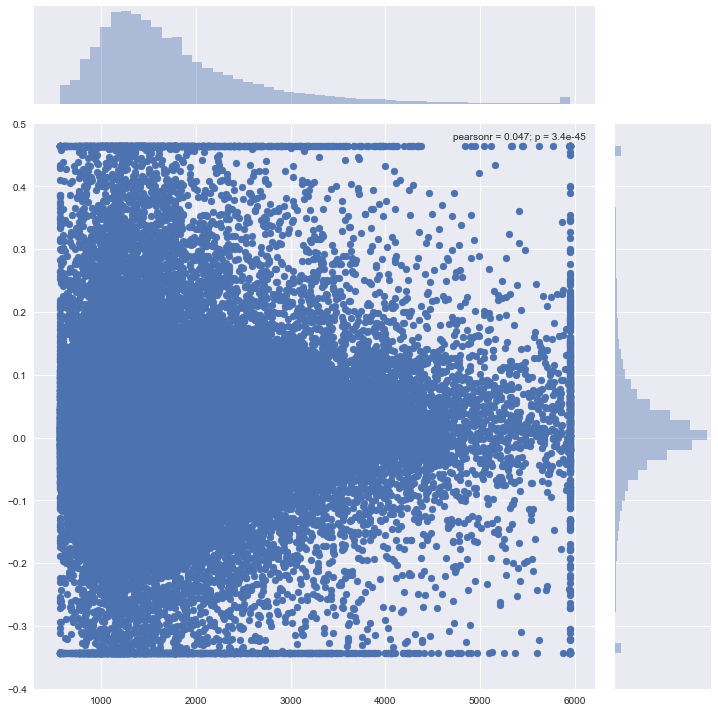

In [584]:
train[col].ix[train[col]>ulimit]=ulimit
train[col].ix[train[col]<llimit]=llimit

plt.figure(figsize=(12,12))
sns.jointplot(x=train[col].values,y=train['logerror'].values,size=10)
sns.plt.ylim(-.4,.5)
plt.show()

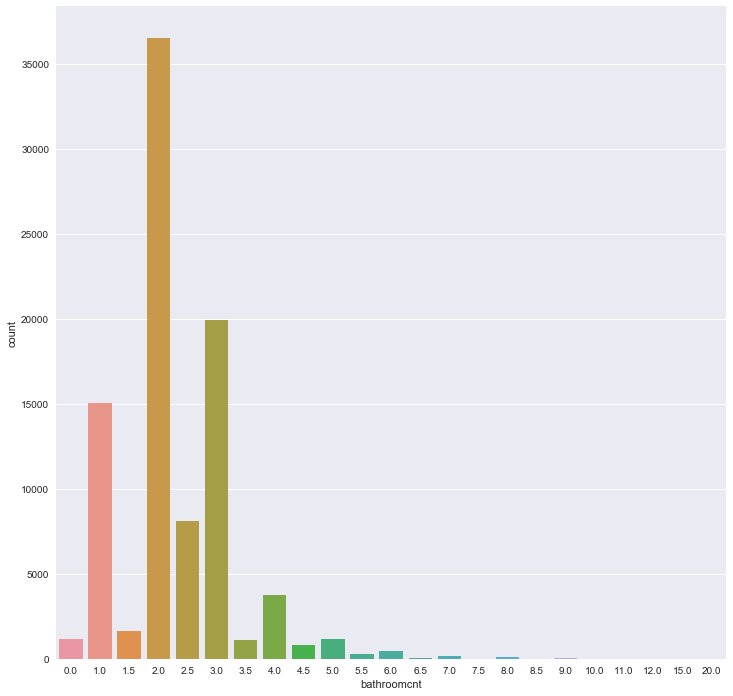

In [585]:
plt.figure(figsize=(12,12))
sns.countplot(x='bathroomcnt',data=train)

/Users/prabha/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/Users/prabha/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


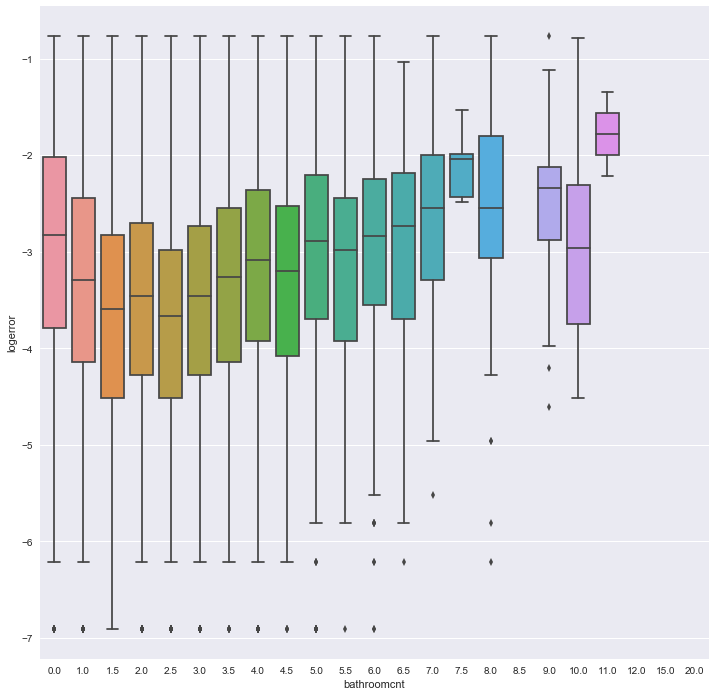

In [586]:
plt.figure(figsize=(12,12))
sns.boxplot(x='bathroomcnt',y=np.log(train.logerror),data=train)

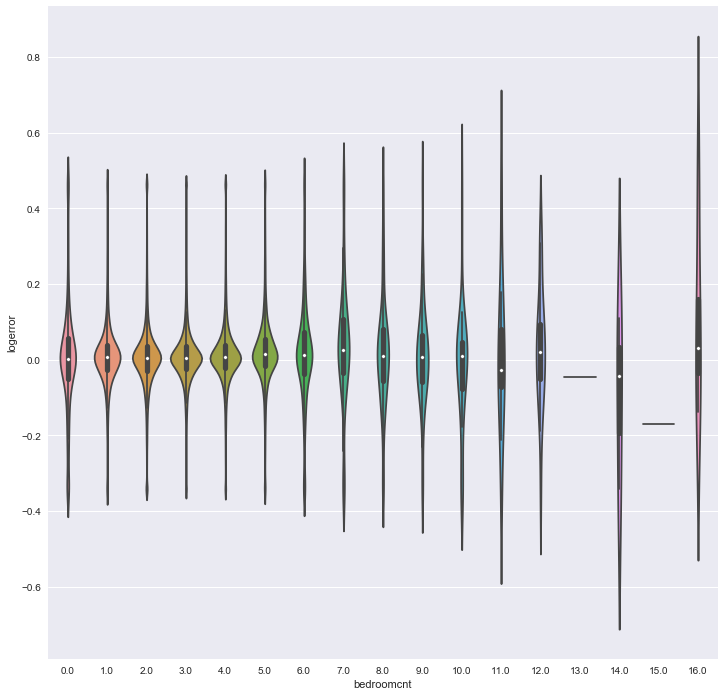

In [587]:
plt.figure(figsize=(12,12))
sns.violinplot(x='bedroomcnt',y='logerror',data=train)

/Users/prabha/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """
/Users/prabha/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


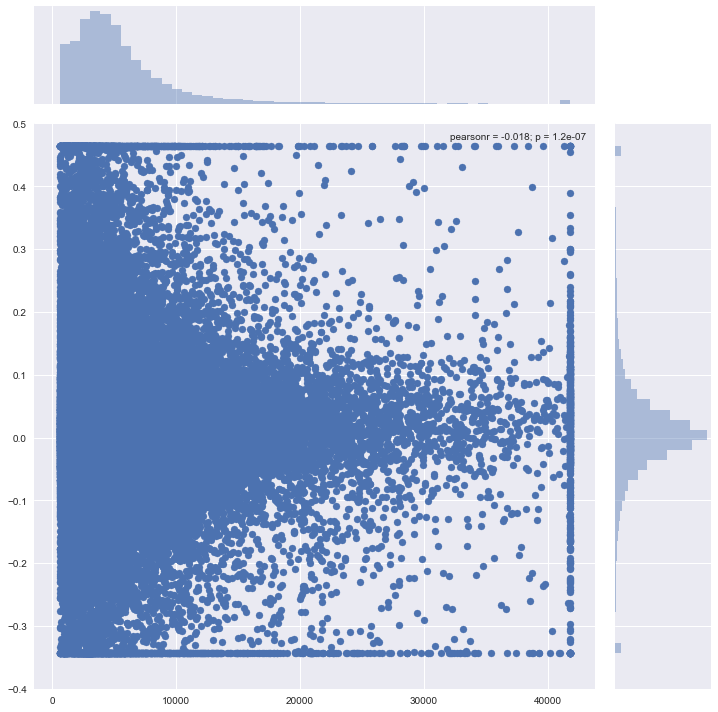

In [588]:
col="taxamount"
ulimit=np.percentile(train[col],99.5)
llimit=np.percentile(train[col],0.5)

train[col].ix[train[col]>ulimit]=ulimit
train[col].ix[train[col]<llimit]=llimit

plt.figure(figsize=(12,12))
sns.jointplot(x=train[col].values,y=train['logerror'].values,size=10)
sns.plt.ylim(-.4,.5)
plt.show()

AttributeError: 'DataFrame' object has no attribute 'sort'

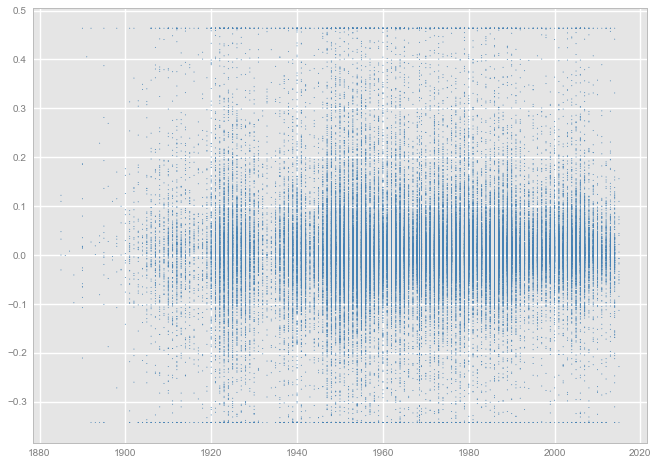

In [589]:
from ggplot import *
ggplot(aes(x='yearbuilt',y='logerror'),data=train)+geom_point(color='steelblue',size=1)+stat_smooth()

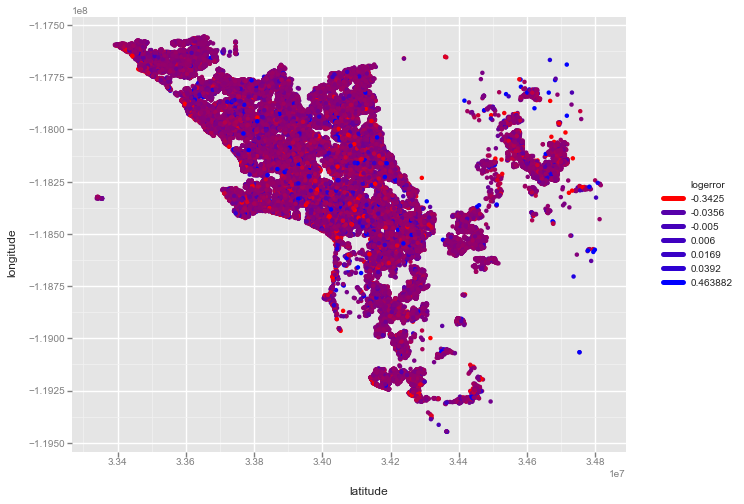

<ggplot: (-9223372036440308529)>

In [590]:
ggplot(aes(x='latitude',y='longitude',color='logerror'),data=train)+geom_point()\
+scale_color_gradient(low='red',high='blue')

Put a bird on it!


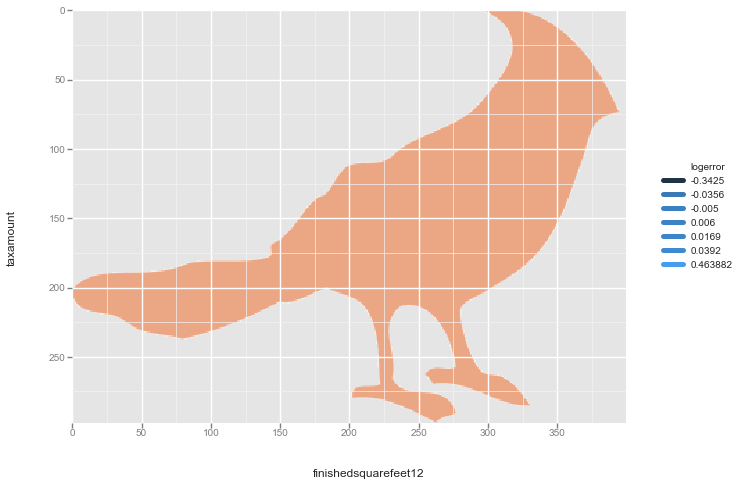

<ggplot: (-9223372036458935096)>

In [591]:
ggplot(aes(x='finishedsquarefeet12',y='taxamount',color='logerror'),data=train)+geom_now_its_art()

In [592]:
train_y=train['logerror'].values
cat_cols=['hashottuborspa','propertycountylandusecode','propertyzoningdesc','fireplaceflag','taxdelinquencyflag']

train=train.drop(['parcelid','logerror','transactiondate','transactionmonth']+cat_cols,axis=1)
feature_names=train.columns.values

In [593]:
from sklearn import ensemble
model=ensemble.ExtraTreesRegressor(n_estimators=25,max_depth=30,max_features=.3,n_jobs=-1,random_state=0)
model.fit(train,train_y)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=30,
          max_features=0.3, max_leaf_nodes=None, min_impurity_split=1e-07,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=-1,
          oob_score=False, random_state=0, verbose=0, warm_start=False)

In [594]:
importances=model.feature_importances_
std=np.std([tree.feature_importances_ for tree in model.estimators_],axis=0)
indices=np.argsort(importances)[::-1][:20]

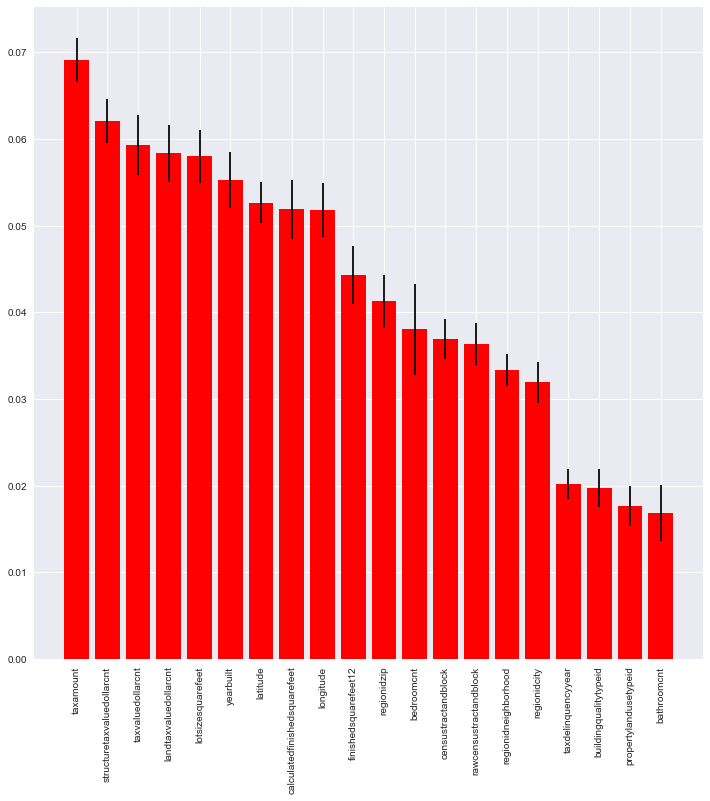

In [596]:
plt.figure(figsize=(12,12))
plt.bar(range(len(indices)),importances[indices],color='r',yerr=std[indices],align='center')
plt.xticks(range(len(indices)), feature_names[indices], rotation='vertical')
plt.show()

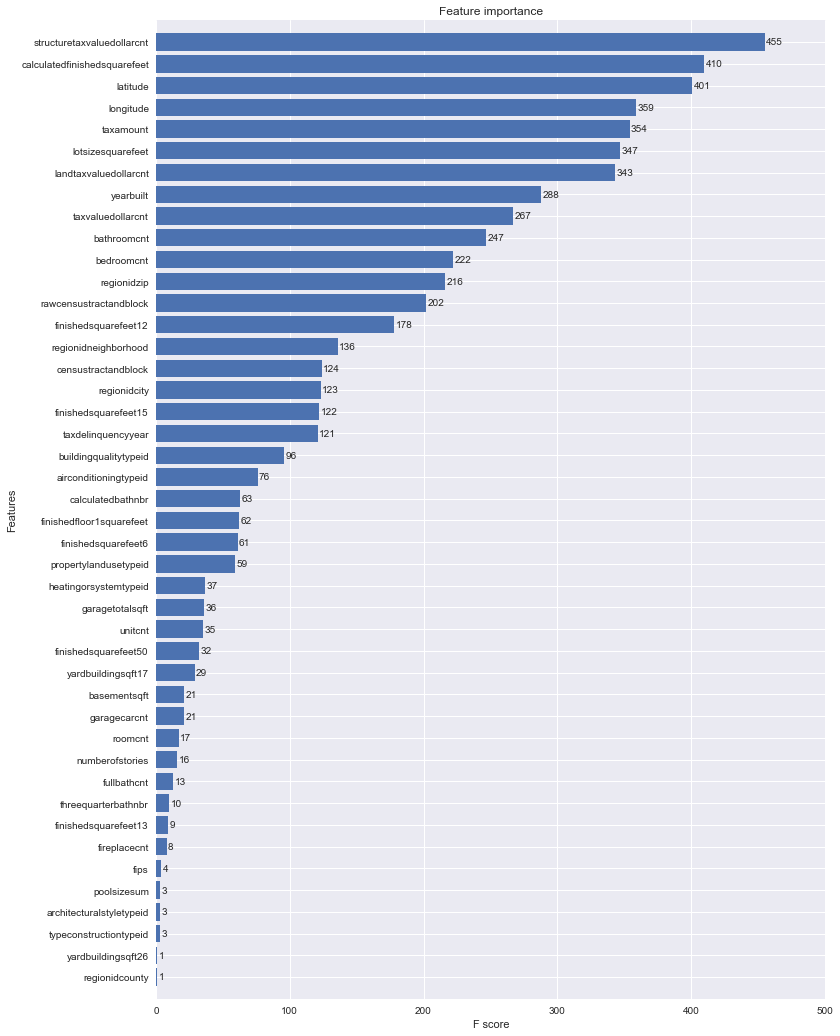

In [600]:
import xgboost as xgb

xgb_params={
    'eta':.05,
    'max_depth':8,
    'subsample':.7,
    'colsample_bytree':.7,
    'objective':'reg:linear',
    'silent':1,
    'seed':0
}

dtrain=xgb.DMatrix(train,train_y,feature_names=feature_names)
model=xgb.train(dict(xgb_params,silent=0),dtrain,num_boost_round=50)

fig,ax=plt.subplots(figsize=(12,18))
xgb.plot_importance(model,max_num_features=50,height=.8,ax=ax)
plt.show()